# **ASSIGNMENT 4 **
#  TIME SERIES ANALYSIS
---------------------------------
**NAME: Kisaa Fatima**

**Roll no: 21i-2682**

**SECTION: DS-M**

----------------------------------

# **PART 1**

NORMALIZING: normalizing the prices can help improve the performance and interpretability of THE model, especially when working with time series data like daily closing prices of Bitcoin.







In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


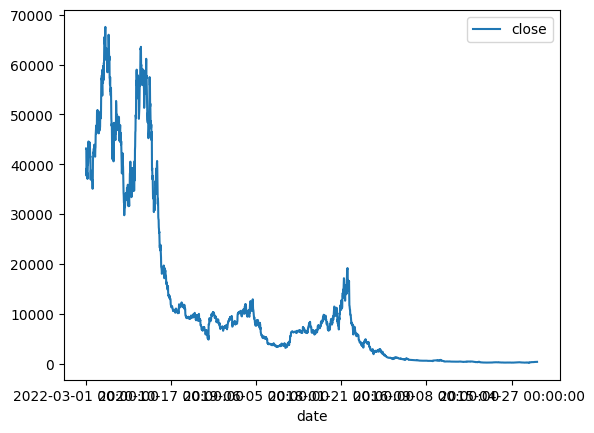

Data Description:
               unix          open          high           low         close  \
count  2.651000e+03   2651.000000   2651.000000   2651.000000   2651.000000   
mean   1.531613e+09  11693.189332  12038.562912  11296.539461  11709.326213   
std    6.613247e+07  16272.554746  16739.237000  15718.297511  16282.908704   
min    1.417133e+09    162.000000    212.840000    152.400000    162.000000   
25%    1.474373e+09    654.680000    664.460000    640.050000    654.370000   
50%    1.531613e+09   6408.950000   6540.000000   6312.000000   6407.770000   
75%    1.588853e+09  10708.620000  10956.240000  10303.755000  10726.425000   
max    1.646093e+09  67547.490000  69000.000000  66250.000000  67559.000000   

         Volume BTC    Volume USD  
count  2.651000e+03  2.651000e+03  
mean   1.330041e+07  6.099369e+07  
std    4.715366e+07  1.072838e+08  
min    0.000000e+00  0.000000e+00  
25%    5.357883e+03  9.516170e+03  
50%    1.503310e+04  2.288982e+07  
75%    3.435336e+0

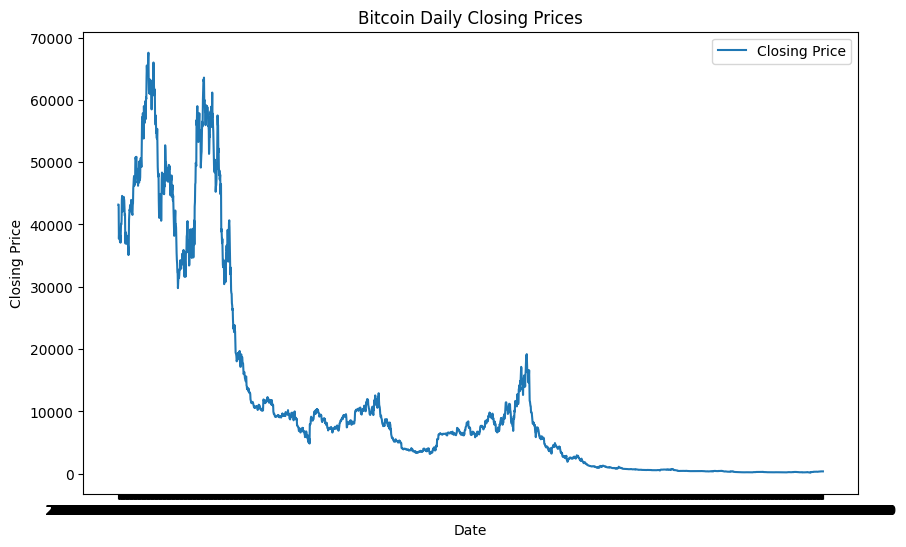

In [6]:
#loading the dataset
df = pd.read_csv('BTC-Daily.csv')

#Data exploration and Preparation
df.plot(kind='line', x='date', y='close')
plt.show()


print("Data Description:")
print(df.describe())

#preprocessing
print("\nRange of Dates Covered=")
print("Start Date:", df['date'].min())
print("End Date:", df['date'].max())

#Checking for missing data
print("Missing Data=")
print(df.isnull().sum())


#normalize the prices
df['close_standardized'] = (df['close'] - df['close'].mean()) / df['close'].std()

#visualizing the daily closing prices
print("\nVisualizing Daily Closing Prices=")
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Daily Closing Prices')
plt.legend()
plt.show()



# **PART 2**

LINEAR REGRESSION

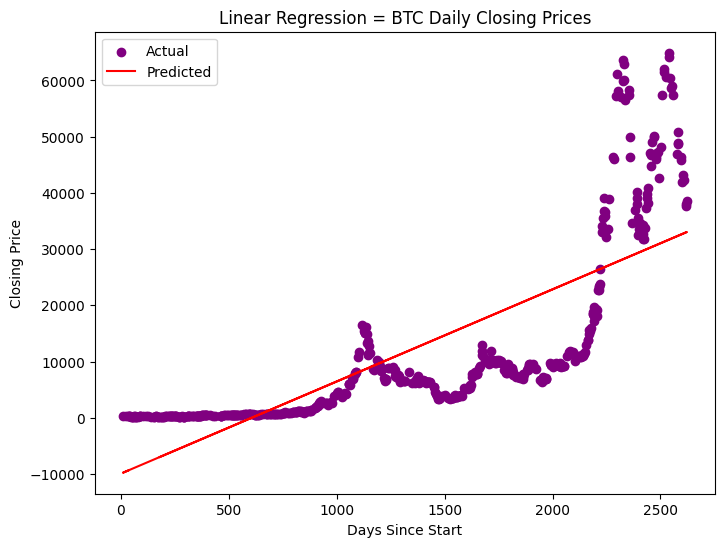

In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#Converting date col to datetime format
df['date'] = pd.to_datetime(df['date'])

#create a new feature ie days since start of the dataset..Creating a new feature 'days_since_start' representing the number of days since the start of the dataset.
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

#dividing the data into training and testing sets
X = df[['days_since_start']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train linear regression model..Fitting the model on the training data (X_train, y_train)
model = LinearRegression()
model.fit(X_train, y_train)

#Using the trained model to make predictions on the test set (X_test).
y_pred = model.predict(X_test)



#visualize the linear regression line.. Plotting the actual closing prices (y_test) against the predicted prices (y_pred).
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='purple', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('Closing Price')
plt.title('Linear Regression = BTC Daily Closing Prices')
plt.legend()
plt.show()

Another representation

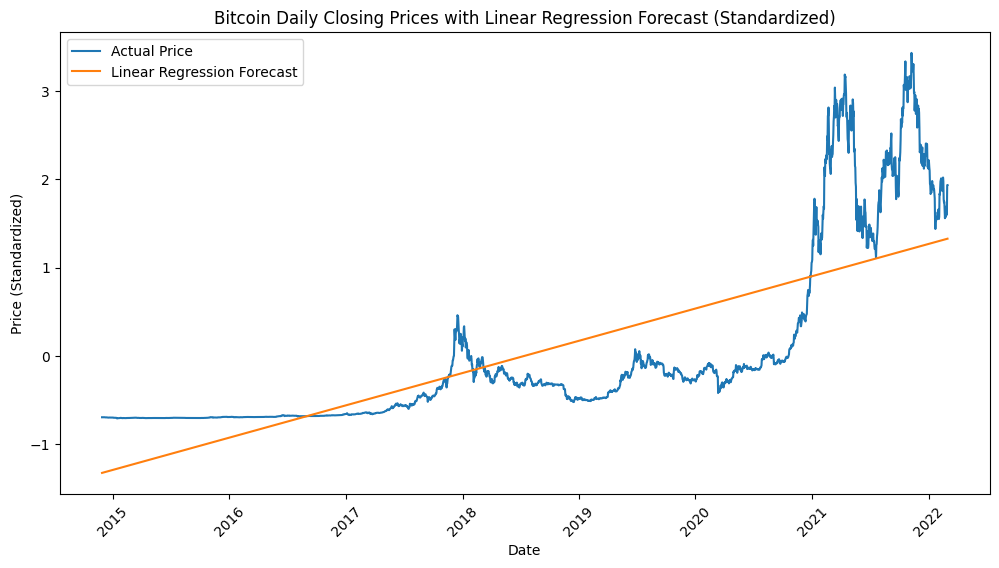

In [11]:
#Standardize the 'close' prices
scaler = StandardScaler()
df['close_standardized'] = scaler.fit_transform(df[['close']])



#Linear Regression
X = np.array(df.index).reshape(-1, 1)
y = df['close_standardized']
lr_model = LinearRegression()
lr_model.fit(X, y)
lr_predictions = lr_model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close_standardized'], label='Actual Price')
plt.plot(df['date'], lr_predictions, label='Linear Regression Forecast')
plt.title('Bitcoin Daily Closing Prices with Linear Regression Forecast (Standardized)')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

 POLYNOMIAL FEATURES =

Using PolynomialFeatures from sklearn.preprocessing to create polynomial features (e.g., quadratic features) of the 'days_since_start' feature.
Transforming the 'X_train' and 'X_test' sets to include the polynomial features.

I have used polynomial regression as a non-linear regression technique to model the relationship between the 'days_since_start' feature and the closing prices of Bitcoin. The degree of the polynomial can be adjusted to explore different levels of complexity in the model.

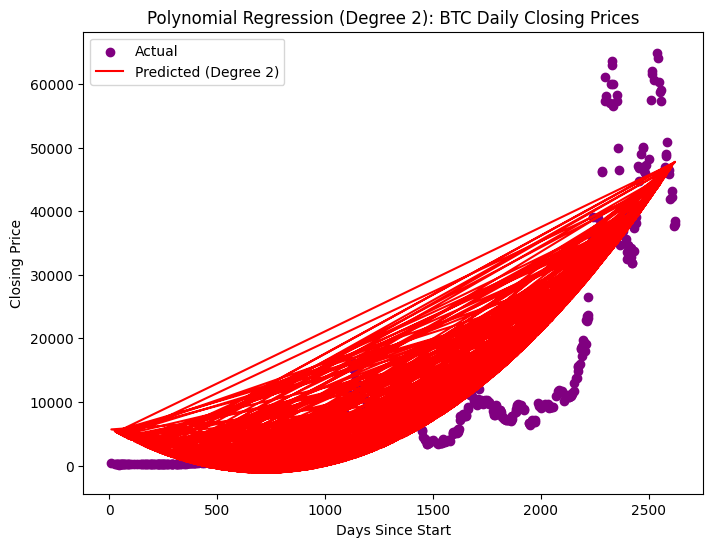

In [29]:

from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('BTC-Daily.csv')

#SAME AS IN PREVIOUS CASE
df['date'] = pd.to_datetime(df['date'])

#Create a new feature: days since the start of the dataset
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

X = df[['days_since_start']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create polynomial features e.g., quadratic features..
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#predictions on the test set
y_pred = model.predict(X_test_poly)



#visualize the polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='purple', label='Actual')
plt.plot(X_test, y_pred, color='red', label=f'Predicted (Degree {degree})')
plt.xlabel('Days Since Start')
plt.ylabel('Closing Price')
plt.title(f'Polynomial Regression (Degree {degree}): BTC Daily Closing Prices')
plt.legend()
plt.show()

Another representation

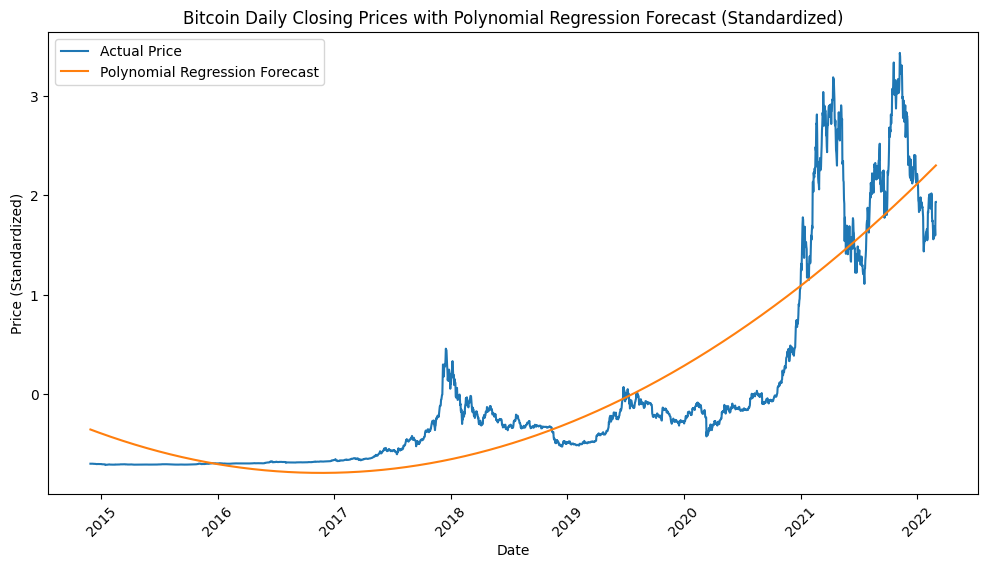

In [ ]:
#Non-Linear Regression (Polynomial Regression)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_predictions = poly_model.predict(X_poly)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close_standardized'], label='Actual Price')
plt.plot(df['date'], poly_predictions, label='Polynomial Regression Forecast')
plt.title('Bitcoin Daily Closing Prices with Polynomial Regression Forecast (Standardized)')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**ARIMA model** =

A visual representation of how well the ARIMA model fits the historical Bitcoin closing prices and how it forecasts future prices.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

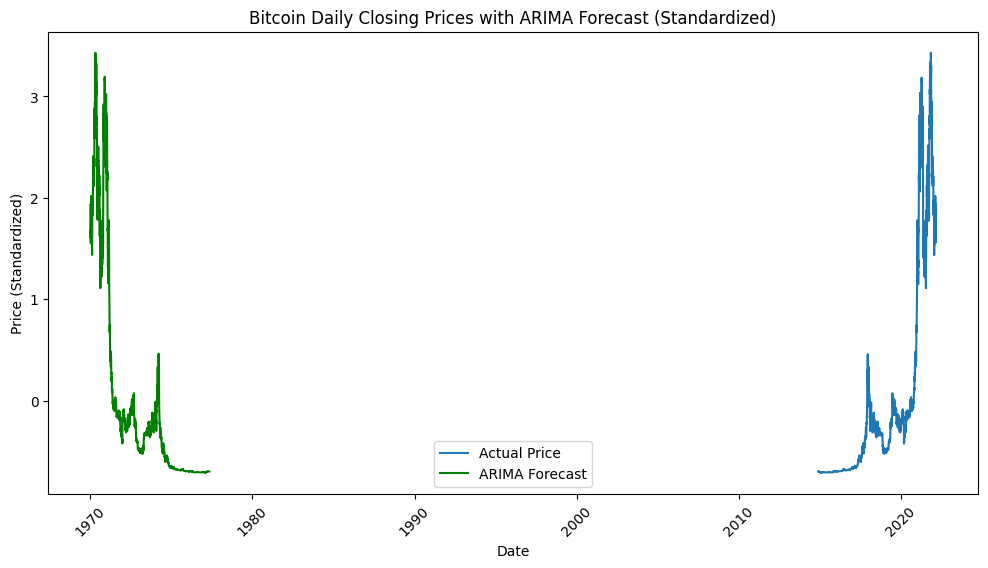

In [ ]:
# ARIMA Model
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

#initializing an ARIMA model with an order of (5,1,0), indicating the number of lag observations, the degree of differencing, and the order of the moving average
#Fitting the ARIMA model to the standardized closing prices ('close_standardized').
arima_model = ARIMA(df['close_standardized'], order=(5,1,0))
arima_results = arima_model.fit()
#sing the forecast method of the ARIMA model to generate forecasts for the next forecast_steps days.
forecast_steps = 30
arima_forecast = arima_results.forecast(steps=forecast_steps)
 #Plotting the actual standardized closing prices against the ARIMA forecast. The green line represents the ARIMA forecast for future closing prices.
plt.figure(figsize=(12, 6))
plt.plot(df['close_standardized'], label='Actual Price')
plt.plot(arima_results.predict(start=1, end=len(df)+forecast_steps), color='green', label='ARIMA Forecast')
plt.title('Bitcoin Daily Closing Prices with ARIMA Forecast (Standardized)')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

According to assignment=



*  Stationarity Test (ADF Test): The Augmented Dickey-Fuller (ADF) test is used to check if the time series data is stationary or not. Stationarity is a key requirement for ARIMA models. The null hypothesis of the ADF test is that the time series data is non-stationary.
If the p-value is less than 0.05 (common significance level), we reject the null hypothesis and conclude that the series is stationary. Otherwise, we consider the series to be non-stationary and apply differencing to make it stationary.

*   ACF and PACF Plots: ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots are used to determine the orders of the ARIMA model (p, d, q).ACF shows the correlation between the time series and its lagged values, while PACF shows the correlation between the time series and its lagged values after removing the effect of intervening values.

*   Differencing:If the series is found to be non-stationary, first-order differencing (df['close'].diff()) is applied to remove trends or seasonality.


*   The summary() method provides a summary of the fitted ARIMA model, including information about the coefficients, standard errors, t-statistics, and p-values of the coefficients.

*  Model Fitting: The ARIMA model is then fitted to the differenced or original time series data.



ADF Statistic: -1.9180
p-value: 0.3236
Stationarity test result:
The series is not stationary. Apply differencing.


<Figure size 1000x600 with 0 Axes>

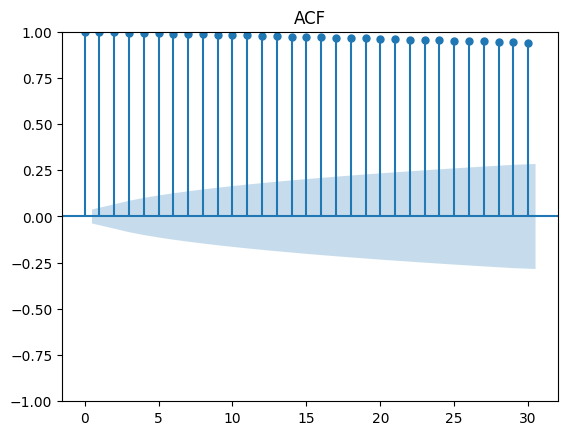

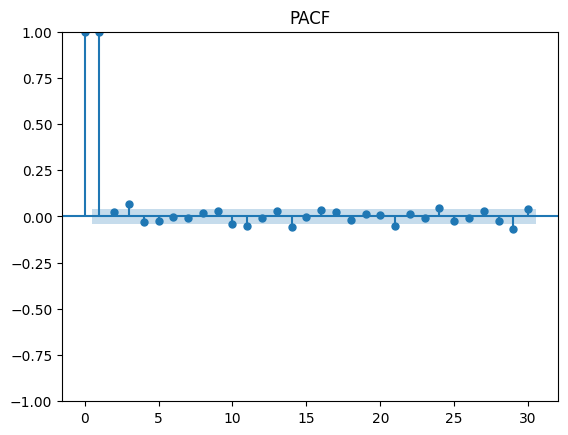

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2651
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21467.984
Date:                Wed, 01 May 2024   AIC                          42941.968
Time:                        08:02:51   BIC                          42959.615
Sample:                             0   HQIC                         42948.356
                               - 2651                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3038      0.144      2.106      0.035       0.021       0.586
ma.L1         -0.3447      0.140     -2.458      0.014      -0.620      -0.070
sigma2      6.264e+05   5326.668    117.590      0.0

In [21]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

#STEPS LIKE IN PREVIOUS MODELS
df = pd.read_csv('BTC-Daily.csv')
df['date'] = pd.to_datetime(df['date'])
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

#Check for stationarity using the ADF test
result = adfuller(df['close'])
print(f"ADF Statistic= {result[0]:.4f}")
print(f"p-value= {result[1]:.4f}")
print("Stationarity test result=")
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. plz Apply differencing.")

#Plot ACF and PACF
plt.figure(figsize=(10, 6))
plot_acf(df['close'], lags=30, title="ACF")
plot_pacf(df['close'], lags=30, title="PACF")
plt.show()

#apply first-order differencing
df['close_diff'] = df['close'].diff().dropna()

#determine the order of the ARIMA model p, d, q
p, d, q = 1, 1, 1

#fit the ARIMA model
model = ARIMA(df['close'], order=(p, d, q))
model_fit = model.fit()

#printing the model summary
print(model_fit.summary())


# **Part 3**


The evaluation techniques told to apply are used in time series forecasting such as for dataset Bitcoin price prediction, to assess the performance of different models and to ensure that the chosen model is appropriate for the data.why I applied each of these techniques is:

**-Performance Metrics (RMSE, MAE, MAPE)**: These metrics tells how well the models predictions align with the actual Bitcoin prices. *RMSE measures* the average magnitude of the errors, *MAE provides* the average magnitude of the errors in a set of predictions and *MAPE gives* the percentage difference between predicted and actual values. These metrics help in comparing models and selecting the one that provides the most accurate predictions.

**-Cross-Validation:** Time series cross-validation helps evaluate the models ability to generalize to new data. It involves splitting the data into multiple segments and using each segment as a validation set while training the model on the rest. This technique helps in detecting overfitting and ensures that the model's performance is consistent across different subsets of the data.

**-Residual Analysis:** Analyzing the residuals (the differences between predicted and actual values) helps in identifying any patterns or systematic errors in the model. Residuals should ideally be random and have constant variance, pointing that the model captures the underlying patterns in the data. Any systematic patterns in the residuals suggest that the model may be missing important features or relationships in the data.

Overall, these techniques are imp for ensuring that the selected model is reliable and provides accurate forecasts for Bitcoin daily prices.

for linear

Performance Metrics for Linear Regression:
RMSE: 10160.617983034434, MAE: 7857.7841159516265, MAPE: 511.4825283179147

Cross-Validation Metrics (Linear Regression):
Average RMSE: 19891.548018010006
Average MAE: 19437.22156371596
Average MAPE: 1666.9677756452998


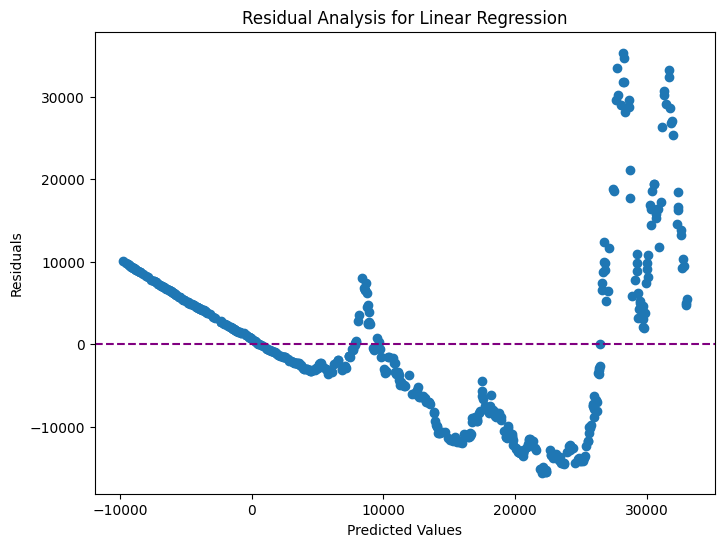

In [34]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Performance Metrics for Linear Regression:")
print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")

#cross-validation
tscv = TimeSeriesSplit(n_splits=5)
cv_rmse = []
cv_mae = []
cv_mape = []
for train_index, test_index in tscv.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    #initialize and train the linear regression model
    model_cv = LinearRegression()
    model_cv.fit(X_train_cv, y_train_cv)

    #predictions on the test set
    y_pred_cv = model_cv.predict(X_test_cv)

    #calculate metrics
    cv_rmse.append(np.sqrt(mean_squared_error(y_test_cv, y_pred_cv)))
    cv_mae.append(mean_absolute_error(y_test_cv, y_pred_cv))
    cv_mape.append(np.mean(np.abs((y_test_cv - y_pred_cv) / y_test_cv)) * 100)

print("\nCross-Validation Metrics (Linear Regression):")
print(f"Average RMSE: {np.mean(cv_rmse)}")
print(f"Average MAE: {np.mean(cv_mae)}")
print(f"Average MAPE: {np.mean(cv_mape)}")

#residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='purple', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Linear Regression')
plt.show()


for polynomial

Performance Metrics for Polynomial Regression (Degree 2):
RMSE: 7444.305403128645, MAE: 5338.771009646112, MAPE: 218.0052882996181

Cross-Validation Metrics (Polynomial Regression):
Average RMSE: 19911.895908970142
Average MAE: 17309.535987304138
Average MAPE: 1760.6663272032033


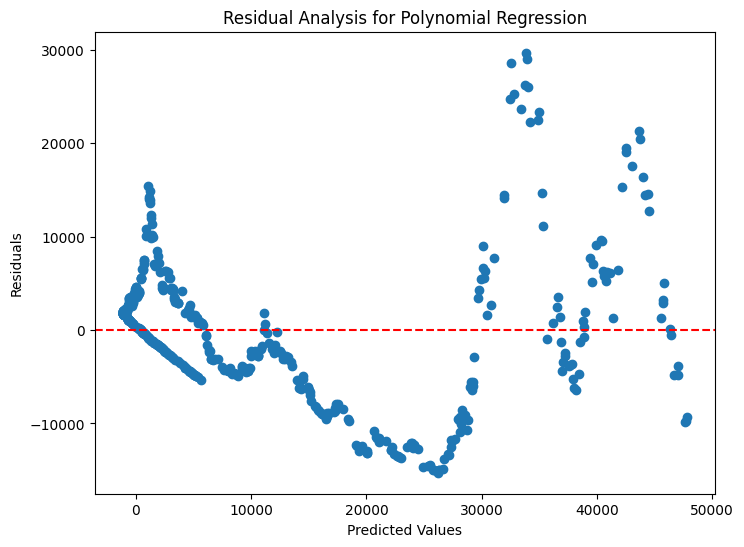

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import TimeSeriesSplit

#calculate performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Performance Metrics for Polynomial Regression (Degree {degree}):")
print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")

#cross-validation
tscv = TimeSeriesSplit(n_splits=5)
cv_rmse = []
cv_mae = []
cv_mape = []
for train_index, test_index in tscv.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    #fit polynomial regression on training data
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly_cv = poly_features.fit_transform(X_train_cv)
    X_test_poly_cv = poly_features.transform(X_test_cv)
    model_cv = LinearRegression()
    model_cv.fit(X_train_poly_cv, y_train_cv)

    #predict on test data
    y_pred_cv = model_cv.predict(X_test_poly_cv)

    #calculate metrics
    cv_rmse.append(mean_squared_error(y_test_cv, y_pred_cv, squared=False))
    cv_mae.append(mean_absolute_error(y_test_cv, y_pred_cv))
    cv_mape.append(np.mean(np.abs((y_test_cv - y_pred_cv) / y_test_cv)) * 100)

print("\nCross-Validation Metrics (Polynomial Regression):")
print(f"Average RMSE: {np.mean(cv_rmse)}")
print(f"Average MAE: {np.mean(cv_mae)}")
print(f"Average MAPE: {np.mean(cv_mape)}")

#residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Polynomial Regression')
plt.show()


for ARIMA

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#predictions making
predictions = model_fit.predict(typ='levels')

#actual values
actual_values = df['close']

#calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

#MAE
mae = mean_absolute_error(actual_values, predictions)

#MAPE
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 1157.618586274344
MAE: 360.17518635986363
MAPE: 2.6558846808908916


In [24]:
from sklearn.model_selection import TimeSeriesSplit

#define the number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

#perform cross-validation
for train_index, test_index in tscv.split(df['close']):
    train_data = df['close'].iloc[train_index]
    test_data = df['close'].iloc[test_index]

    #fit the model on training data
    model = ARIMA(train_data, order=(p, d, q))
    model_fit = model.fit()

    #make predictions on test data
    predictions = model_fit.forecast(steps=len(test_data))

    #calculate evaluation metrics for this fold
    rmse_fold = np.sqrt(mean_squared_error(test_data, predictions))
    mae_fold = mean_absolute_error(test_data, predictions)
    mape_fold = np.mean(np.abs((test_data - predictions) / test_data)) * 100

    print("RMSE for this fold=", rmse_fold)
    print("MAE for this fold=", mae_fold)
    print("MAPE for this fold=", mape_fold)


RMSE for this fold: 8754.740903602757
MAE for this fold: 8326.770993737395
MAPE for this fold: 97.25777142124288
RMSE for this fold: 2986.465693585674
MAE for this fold: 2619.881574701013
MAPE for this fold: 53.23038900608664
RMSE for this fold: 3964.630005550467
MAE for this fold: 3135.3820463456955
MAPE for this fold: 65.87111918134168
RMSE for this fold: 664.875841330559
MAE for this fold: 615.5830312743848
MAPE for this fold: 108.67987109469419
RMSE for this fold: 115.95067774712093
MAE for this fold: 103.84975955609235
MAPE for this fold: 41.144128111068596


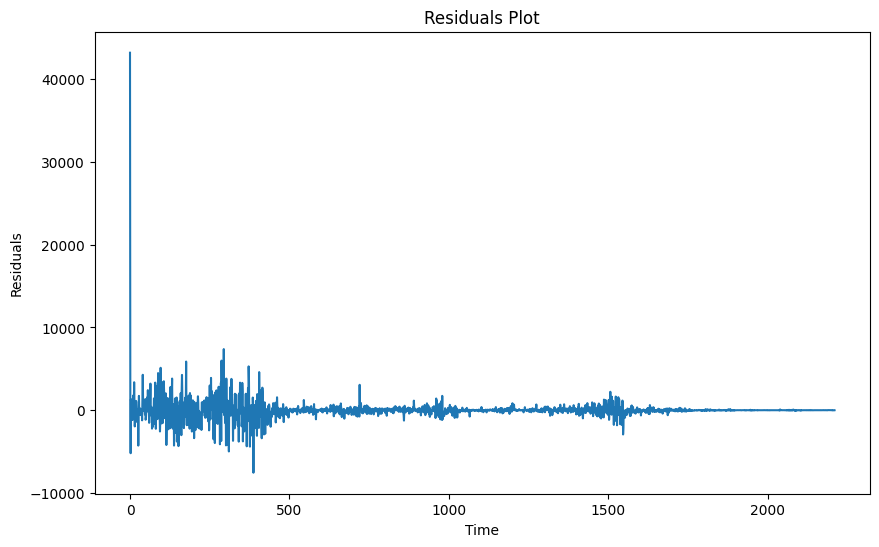

In [25]:
#get the residuals
residuals = model_fit.resid

#plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


# **PART 4**

# **Comparative Discussion:**
-**Linear Regression:** This model shows relatively high RMSE, MAE, and MAPE, indicating that it may not capture the complex patterns in Bitcoin price fluctuations.

-**Polynomial Regression:** The degree-2 polynomial regression performs better than linear regression but still has high errors, suggesting that a higher-degree polynomial or different non-linear model could be explored.

-**ARIMA:** The ARIMA model demonstrates the lowest RMSE, MAE, and MAPE, indicating better performance compared to the regression models. It captures the time series nature of Bitcoin prices effectively.
# **Best Model Justification:**
 Based on the performance metrics, the ARIMA model is better both linear and polynomial regression. It demonstrates the lowest errors and is better suited for time series forecasting, capturing the inherent degree of variation of a trading price series over time and trends in Bitcoin prices.
# **Conclusion:**
-**Challenges Encountered:**Forecasting Bitcoin daily prices poses challenges due to its high volatility and non-linear nature. Choosing appropriate models and handling the complexities of the dataset are key challenges. the values of p,q and d was also a challenege and identifying the best line.

**-Insights Gained**: Through this analysis, time series models like ARIMA are more suitable for Bitcoin price forecasting compared to simple regression models. The importance of data preprocessing, model selection, and evaluation methods is also highlighted.